In [81]:
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv("movies.csv", encoding="ISO-8859-1")
ratings = pd.read_csv("ratings.csv", encoding="ISO-8859-1")


In [3]:
movies.head()

,movie_id,title,genre,Unnamed: 3
0,1,Toy Story (1995),Animation|Children's|Comedy,NaN
1,2,Jumanji (1995),Adventure|Children's|Fantasy,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN


In [4]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
final_dataset = ratings.pivot(index= "movie_id", columns = "user_id", values="rating")

In [6]:
final_dataset.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,5.0,5.0,...,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [7]:
final_dataset.fillna(0, inplace = True)

In [8]:
final_dataset.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,...,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# removing noise from dataset
no_user_voted = ratings.groupby("movie_id")['rating'].agg('count')
no_movies_voted =ratings.groupby("user_id")['rating'].agg('count')

In [10]:
no_user_voted

movie_id
1       2077
2        701
3        478
4        170
5        296
        ... 
3948     862
3949     304
3950      54
3951      40
3952     388
Name: rating, Length: 3706, dtype: int64

In [11]:
no_movies_voted

user_id
1        53
2       129
3        51
4        21
5       198
       ... 
6036    888
6037    202
6038     20
6039    123
6040    341
Name: rating, Length: 6040, dtype: int64

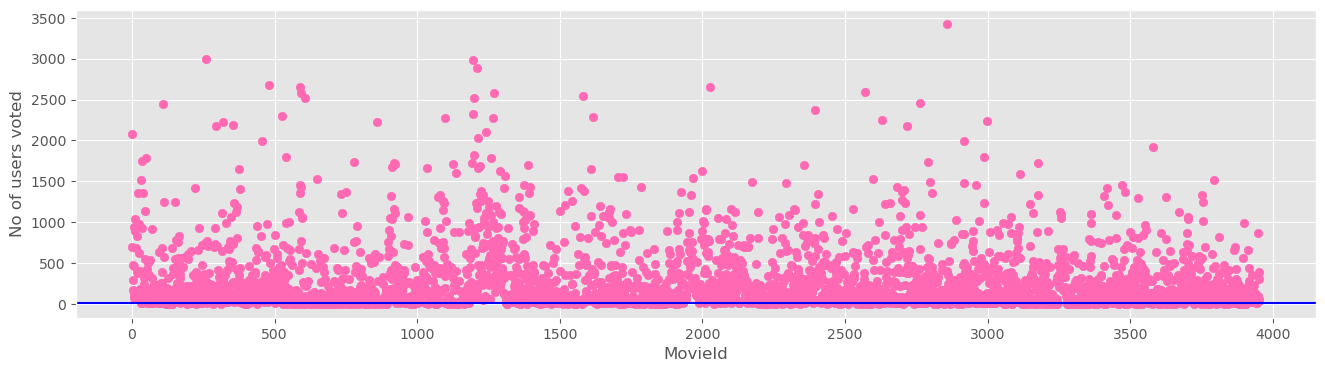

In [12]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig,axes = plt.subplots(1,1, figsize=(16,4))
plt.scatter(no_user_voted.index, no_user_voted, color = "hotpink")
plt.axhline(y=10, color ="blue")
plt.xlabel("MovieId")
plt.ylabel("No of users voted")
plt.show()

In [13]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index, :]

In [14]:
final_dataset

user_id,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,...,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


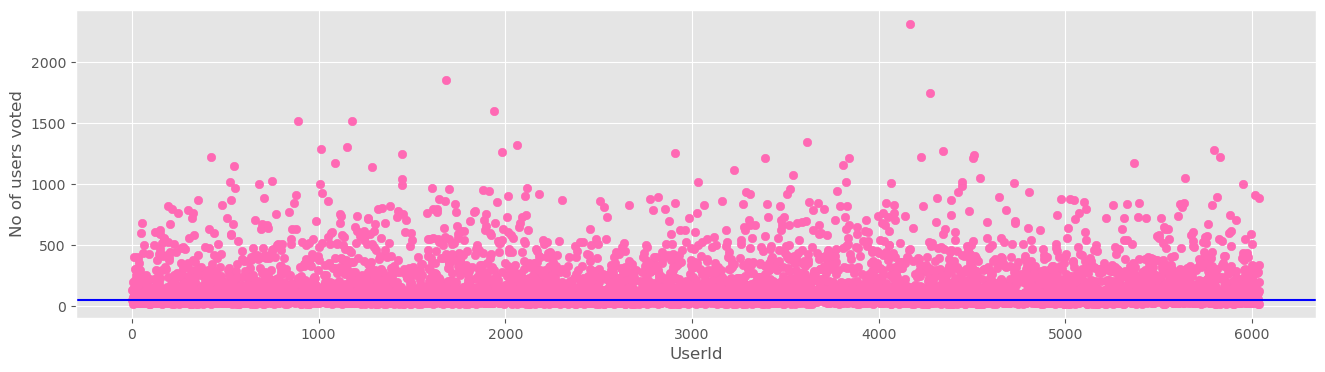

In [15]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig,axes = plt.subplots(1,1, figsize=(16,4))
plt.scatter(no_movies_voted.index, no_movies_voted, color = "hotpink")
plt.axhline(y=50, color ="blue")
plt.xlabel("UserId")
plt.ylabel("No of users voted")
plt.show()

In [16]:
final_dataset = final_dataset.loc[:, no_movies_voted[no_movies_voted>50].index]

In [17]:
final_dataset.shape

(3233, 4247)

In [18]:
final_dataset.head()

user_id,1,2,3,5,6,8,9,10,11,13,...,6026,6030,6031,6032,6033,6035,6036,6037,6039,6040
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,4.0,4.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
sample =np.array([[1,0,0,0,0],[0,0,2,0,0],[0,0,4,0,0]])
sparsity = 1.0 - (np.count_nonzero(sample)/float(sample.size))
print(sparsity)

0.8


In [20]:
from scipy.sparse import csr_matrix

In [21]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [22]:
print(csr_data)

  (0, 0)	5.0
  (0, 4)	4.0
  (0, 5)	4.0
  (0, 6)	5.0
  (0, 7)	5.0
  (0, 12)	4.0
  (0, 13)	5.0
  (0, 15)	4.0
  (0, 18)	3.0
  (0, 20)	3.0
  (0, 24)	5.0
  (0, 26)	5.0
  (0, 28)	5.0
  (0, 32)	5.0
  (0, 33)	4.0
  (0, 34)	4.0
  (0, 35)	5.0
  (0, 38)	5.0
  (0, 42)	4.0
  (0, 45)	5.0
  (0, 47)	3.0
  (0, 50)	3.0
  (0, 51)	5.0
  (0, 52)	5.0
  (0, 53)	4.0
  :	:
  (3232, 3285)	5.0
  (3232, 3357)	3.0
  (3232, 3368)	5.0
  (3232, 3378)	4.0
  (3232, 3382)	3.0
  (3232, 3389)	4.0
  (3232, 3392)	4.0
  (3232, 3409)	4.0
  (3232, 3459)	3.0
  (3232, 3537)	4.0
  (3232, 3553)	4.0
  (3232, 3566)	4.0
  (3232, 3575)	4.0
  (3232, 3644)	4.0
  (3232, 3732)	4.0
  (3232, 3750)	5.0
  (3232, 3778)	4.0
  (3232, 3829)	5.0
  (3232, 3927)	3.0
  (3232, 3985)	3.0
  (3232, 4083)	4.0
  (3232, 4095)	3.0
  (3232, 4098)	4.0
  (3232, 4164)	1.0
  (3232, 4215)	4.0


In [23]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine',algorithm='brute', n_neighbors = 20, n_jobs =-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [24]:
movies.head()

,movie_id,title,genre,Unnamed: 3
0,1,Toy Story (1995),Animation|Children's|Comedy,NaN
1,2,Jumanji (1995),Adventure|Children's|Fantasy,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN


In [36]:
movies = movies.drop(columns=['Unnamed: 3'])

In [73]:

movies.columns = movies.columns.str.strip()

def get_recommendation(movie_name):
    
    movie_list = movies[movies['title'].str.contains(movie_name, case=False, na=False)]
    
    if len(movie_list):
       
        movie_id = movie_list.iloc[0]['movie_id']
        movie_idx = final_dataset[final_dataset['movie_id'] == movie_id].index[0]     
        distance, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=10+1)
        rec_movie_indices = sorted(
            list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())),
            key=lambda x: x[1]
        )[1:] 
        
        recommended_movies = []
        for val in rec_movie_indices:
            recommended_movie_id = final_dataset.iloc[val[0]]['movie_id']
            idx = movies[movies['movie_id'] == recommended_movie_id].index[0]
            recommended_movies.append({
                'Title': movies.iloc[idx]['title'],
                'Distance': val[1]
            })
        df = pd.DataFrame(recommended_movies, index=range(1, 11))
        return df
    else:
        return "Movie not found...."
        



In [67]:
get_recommendation("avatar")

Empty DataFrame
Columns: [movie_id, title, genre]
Index: []


'Movie not found....'

In [80]:
def recommend_movies(movie_name):
    df = get_recommendation(movie_name)
    if isinstance(df, pd.DataFrame):
        return df
    else:
        return df

app = gr.Interface(
    fn=recommend_movies,
    inputs=gr.Textbox(label="Movie Name", placeholder="Enter a movie name"),
    outputs=gr.Dataframe(headers=["Title", "Distance"], label="Recommended Movies"),
    title = "Movie reccomender syatem",# Updated to display DataFrame
    description="Enter a movie name to get a list of recommended movies"
)

app.launch()

Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\Sami\anaconda3\envs\tf_env\lib\site-packages\gradio\queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
  File "C:\Users\Sami\anaconda3\envs\tf_env\lib\site-packages\gradio\route_utils.py", line 321, in call_process_api
    output = await app.get_blocks().process_api(
  File "C:\Users\Sami\anaconda3\envs\tf_env\lib\site-packages\gradio\blocks.py", line 1945, in process_api
    data = await self.postprocess_data(block_fn, result["prediction"], state)
  File "C:\Users\Sami\anaconda3\envs\tf_env\lib\site-packages\gradio\blocks.py", line 1768, in postprocess_data
    prediction_value = block.postprocess(prediction_value)
  File "C:\Users\Sami\anaconda3\envs\tf_env\lib\site-packages\gradio\components\dataframe.py", line 263, in postprocess
    value = pd.read_csv(value)  # type: ignore
  File "C:\Users\Sami\anaconda3\envs\tf_env\lib\site-packages\pandas\io\parsers\readers.py", line 1026, in read_csv